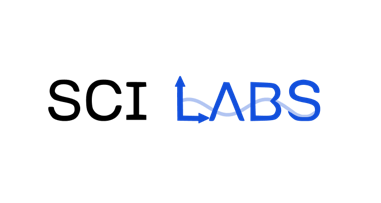

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Hooverova priehrada

V tejto úlohe se pozrieme na vývoj výšky hladiny v americkej [Hoover Dam](https://sk.wikipedia.org/wiki/Hoover_Dam) a preskúmame zmenu tlaku, ktorá tento jav sprevádza.

Vypočítame priemernú hladinu vody, zistíme maximálnu a minimálnu hladinu vody a vypočítame korešpondujúci hydrostatický tlak!

In [ ]:
data = pd.read_csv("hoover_data.txt", comment = "#", sep = "\t")

# Zdroj dat: https://waterdata.usgs.gov/monitoring-location/09421500/#parameterCode=00065&period=P365D&showMedian=false

Popis načítaných dat (ktoré sú pre nás dôležité):
- datetime - dátum a čas merania hladiny,
- 103727_00065 $h$ - nešikovne pomenovaná premenná (premenujme ju!) opisujúca výšku vodnej hladiny meranú z určitého bodu priehrady - POZOR výška je uvedená v stopách!

In [ ]:
#Premenovanie stĺpca

data = data.rename(columns={"103727_00065": "vyska"})

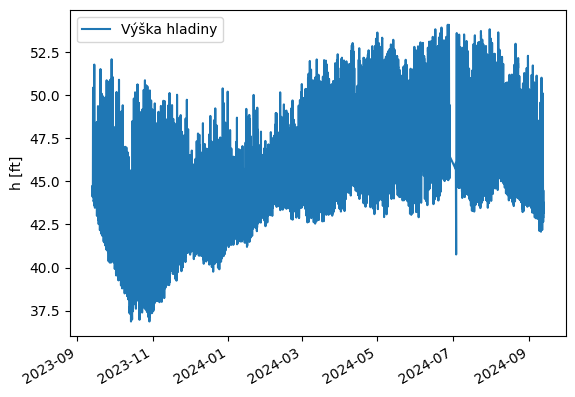

In [ ]:
# Graf výšky hladiny vody Hooverovej priehrady

# Načítanie dat
dates = data["datetime"]
values = data["vyska"]

# Prevod dátumu z textovej podoby na objekt datetime
dates = [datetime.strptime(date, "%Y-%m-%d %H:%M") for date in dates]

# Vykreslenie grafu
plt.plot(dates, values, label = "Výška hladiny")

# Formátovanie osi x (dátumy) tak, aby sa dátumy neprekrývali
plt.gcf().autofmt_xdate()

plt.ylabel("h [ft]")
plt.legend()
plt.show()

Stopy nie sú [jednotky SI](https://sk.wikipedia.org/wiki/SI), ale sú to jednotky imperialnej [sústavy jednotiek](https://sk.wikipedia.org/wiki/Britsko-americk%C3%A1_s%C3%BAstava_jednotiek). Aby sme sa vyhli nedorozumeniam, prevedieme výšku povrchu na metre. Jedna stopa je presne 0,3048 metra, takže stačí stĺpec vynásobiť týmto číslom.

In [ ]:
data["vyska"] = 0.3048*data["vyska"]

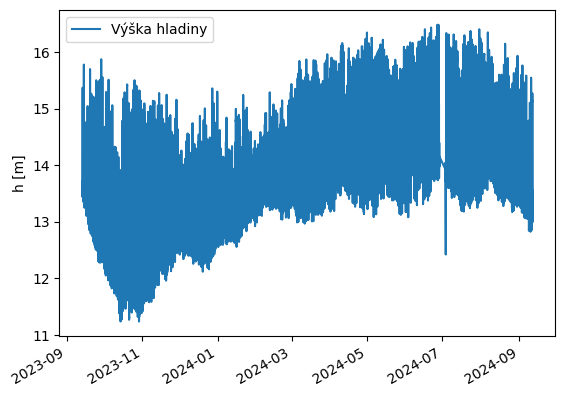

In [ ]:
# Graf výšky hladiny na Hooverovej priehrade

# Načítanie dat
dates = data["datetime"]
values = data["vyska"]

# Prevod dátumu z textovej podoby na objekt datetime
dates = [datetime.strptime(date, "%Y-%m-%d %H:%M") for date in dates]

# Vykreslenie grafu
plt.plot(dates, values, label = "Výška hladiny")

# Formátovanie osi x (dátumy) tak, aby sa dátumy neprekrývali
plt.gcf().autofmt_xdate()

plt.ylabel("h [m]")
plt.legend()
plt.show()

Vypočítajte priemernú výšku hladiny podľa vzorca

\begin{equation*}
    \bar{h} = \frac{\sum_i^N h_i}{N},
\end{equation*}

kde $N$ je počet meraní a $h_i$ je aktuálna výška hladiny

In [ ]:
suma_h = 0

for i in range(len(data)):
    suma_h += data.loc[i, "vyska"]

prum_h = suma_h/len(data)

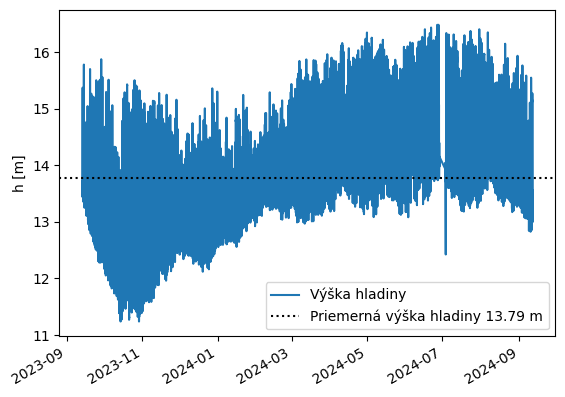

In [ ]:
# Graf výšky hladiny na Hooverovej priehrade

# Načítanie dat
dates = data["datetime"]
values = data["vyska"]

# Prevod dátumu z textovej podoby na objekt datetime
dates = [datetime.strptime(date, "%Y-%m-%d %H:%M") for date in dates]

# Vykreslenie grafu
plt.plot(dates, values, label = "Výška hladiny")

# Vykreslenie priemernej hodnoty
plt.axhline(prum_h, color = "black", label = f"Priemerná výška hladiny {prum_h:,.2f} m", linestyle = ":")

# Formátovanie osi x (dátumy) tak, aby sa dátumy neprekrývali
plt.gcf().autofmt_xdate()

# plt.xlabel("Doba merania")
plt.ylabel("h [m]")
plt.legend()
plt.show()

Teraz použijeme jednoduchý kód na zistenie minimálnej a maximálnej výšky hladiny.

Tento kód prechádza všetky riadky tabuľky "data" a hľadá maximálnu a minimálnu hodnotu stĺpca "vyska". Na začiatku sú maximálna a minimálna hodnota nastavené na prvú hodnotu v stĺpci. Potom sa pomocou cyklu kontrolujú všetky ostatné riadky. Ak sa nájde vyššia hodnota než aktuálne maximum, aktualizuje sa maximálna hodnota a uloží sa index riadka, kde bola nájdená. Podobne, ak sa nájde nižšia hodnota než aktuálne minimum, aktualizuje sa minimálna hodnota a uloží sa index tohto riadka.

Výsledkom je, že na konci cyklu budete mať uložené najvyššiu a najnižšiu hodnotu v stĺpci "vyska" spolu s ich pozíciami (indexmi) v tabuľke.

In [ ]:
max = data.loc[0, "vyska"]
min = data.loc[0, "vyska"]

for i in range(len(data)):
    if data.loc[i, "vyska"] > max:
        max = data.loc[i, "vyska"]
        max_i = i
    if data.loc[i, "vyska"] < min:
        min = data.loc[i, "vyska"]
        min_i = i

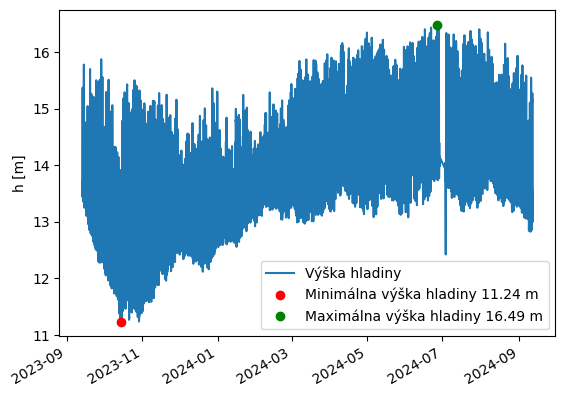

In [ ]:
# Graf výšky hladiny na Hooverovej priehrade

# Načitanie dat
dates = data["datetime"]
values = data["vyska"]

# Prevod dátumu z textovej podoby na objekt datetime
dates = [datetime.strptime(date, "%Y-%m-%d %H:%M") for date in dates]

# Vykreslenie grafu
plt.plot(dates, values, label = "Výška hladiny")

# Vykreslenie maxima a minima (extrémov)
plt.plot(dates[min_i], min, "o", color = "red", label = f"Minimálna výška hladiny {min:,.2f} m")
plt.plot(dates[max_i], max, "o", color = "green", label = f"Maximálna výška hladiny {max:,.2f} m")

# Formátovanie osi x (dátumy) tak, aby sa dátumy neprekrývali
plt.gcf().autofmt_xdate()

# plt.xlabel("Doba merania")
plt.ylabel("h [m]")
plt.legend()
plt.show()

Predstavme si, že na breh nádrže umiestnime senzor tlaku v čase, keď je hladina v nádrži minimálna (snímač je umiestnený vo výške 11,24 m). Aký tlak bude snímač merať, keď bude hladina vody na maxime, t. j. vo výške 16,49 m. Výška vodnej hladiny nad senzorom je $\Delta h = h_{max} - h_{min}$. Tlak vody pôsobiaci na snímač sa vypočíta pomocou Archimedovho zákona následovne

\begin{equation*}
    p_h = \Delta h \rho g,
\end{equation*}

kde $\rho \approx 1000$ $\text{kg/m}^3$ je predpokladaná hustota vody a $g \approx 9.81$ $\text{m/s}^2$ je gravitačné zrýchlenie. Nesmieme zabudnúť ani na tlak vzduchu ($p_a = 101325$ $Pa$), ktorý pôsobí na vodnú hladinu, takže ho namerá senzor umiestnený pod hladinou.

\begin{equation*}
    p = p_h + p_a
\end{equation*}

In [ ]:
rho = 1000
g = 9.81

In [ ]:
p = (max-min)*rho*g

print(f"Tlak nameraný senzorom pod vodnou hladinou bude p = {p + 101325:,.2f} Pa. \n Rozdiel tlakov spôsobený hydrostatickým tlakom je {p:,.2f} Pa.")

Tlak nameraný senzorom pod vodnou hladinou bude p = 152,814.32 Pa. 
 Rozdiel tlakov spôsobený hydrostatickým tlakom je 51,489.32 Pa.
